## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures. 

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC

## Part 1: Data Visualization and Analysis

> "Visualization gives you answers to questions you didn’t know you had." ~ Ben Schneiderman
>

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is car_price.csv.


In [4]:
# Load the dataset
car_price_df = pd.read_csv('car_price.csv')

In [5]:
car_price_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


<b> 1.1 Plot the distribution of the following features as a small multiple of histograms. </b>
1. carlength 
2. carwidth
3. stroke 
4. curbweight

<b></b>

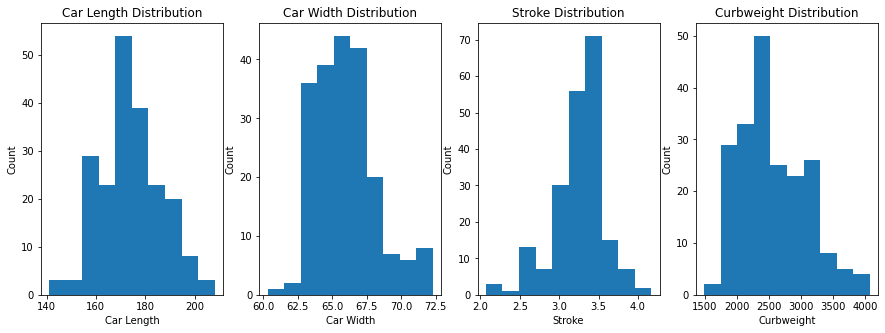

In [6]:
### Code here
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))

ax1.hist(car_price_df['carlength'])
ax1.set_xlabel('Car Length')
ax1.set_ylabel('Count')
ax1.set_title('Car Length Distribution')

ax2.hist(car_price_df['carwidth'])
ax2.set_xlabel('Car Width')
ax2.set_ylabel('Count')
ax2.set_title('Car Width Distribution')

ax3.hist(car_price_df['stroke'])
ax3.set_xlabel('Stroke')
ax3.set_ylabel('Count')
ax3.set_title('Stroke Distribution')

ax4.hist(car_price_df['curbweight'])
ax4.set_xlabel('Curbweight')
ax4.set_ylabel('Count')
ax4.set_title('Curbweight Distribution')

plt.show()

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables </b>
1. fueltype 
2. drivewheel
3. enginelocation


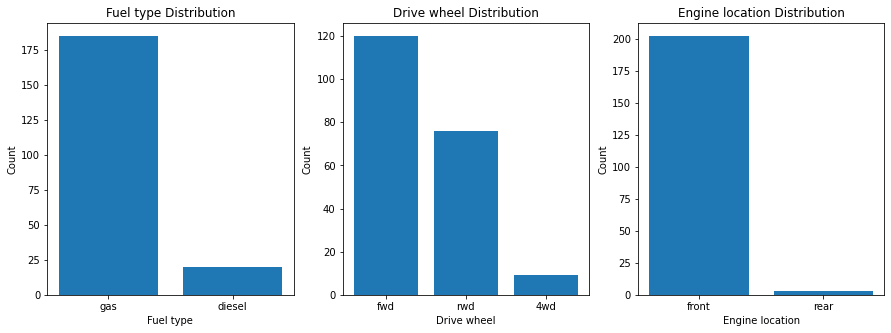

In [7]:
### Code here
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.bar(car_price_df['fueltype'].value_counts().index,car_price_df['fueltype'].value_counts())
ax1.set_xlabel('Fuel type')
ax1.set_ylabel('Count')
ax1.set_title('Fuel type Distribution')

ax2.bar(car_price_df['drivewheel'].value_counts().index,car_price_df['drivewheel'].value_counts())
ax2.set_xlabel('Drive wheel')
ax2.set_ylabel('Count')
ax2.set_title('Drive wheel Distribution')

ax3.bar(car_price_df['enginelocation'].value_counts().index,car_price_df['enginelocation'].value_counts())
ax3.set_xlabel('Engine location')
ax3.set_ylabel('Count')
ax3.set_title('Engine location Distribution')

plt.show()

<b> 1.3 Plot relationships between the following features and the target variable <em>price</em> as a small multiple of boxplots. </b>
1. cylindernumber 
2. enginetype

<b> Note: Make sure to order the x-axis labels in increasing order for cylindernumber. </b>

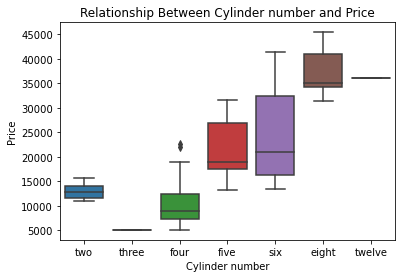

In [8]:
### Code here
sns.boxplot(x = car_price_df['cylindernumber'],
            y = car_price_df['price'], order = ['two','three','four','five','six','eight','twelve']).set(
                xlabel='Cylinder number', 
                ylabel='Price',
                title='Relationship Between Cylinder number and Price'
            )

plt.show()

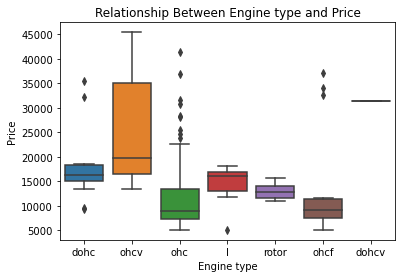

In [9]:
sns.boxplot(x = car_price_df['enginetype'],
            y = car_price_df['price']).set(
                xlabel='Engine type', 
                ylabel='Price',
                title='Relationship Between Engine type and Price'
            )

plt.show()

<b> 1.4 What do you infer from the visualization above. Comment on the skewness of the distributions (histograms), class imbalance (bar charts), and relationship between categories and price of the car (boxplots). </b>

#### Comment here
as for skewness, the car width and curb weight distributions are positively skewed, the stroke distribution is negatively skewed and the distribution of car length is rather balanced.

as for class imbalance, the three class data like fuel type, engine location and drive wheel all are imbalanced, especially for fuel type and engine location.

as for relationship, the cylinder number has positive linear relationship with price and the engine type has little linear relationship with price. the former one is more obvious.

------------------------------------------------------------------------------------------------------------------

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression
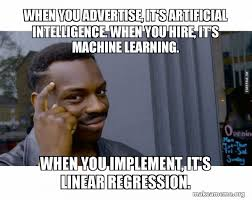



In part 1, we will use two datasets - synthetic and Car Price to train and evaluate our linear regression model.

### Synthetic Data

<b>2.1.1 Generate 100 samples of synthetic data using the following equations. </b>

$ \epsilon ∼ \mathcal{N}(0,4) $

$ y = 7x - 8 + \epsilon $

You may use [np.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for generating $\epsilon$. 

In [11]:
np.random.seed(0)
X = np.linspace(0, 15, 100)
epsilon = np.random.normal(0,4,100)
y = 7*X - 8 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
*   Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.2 Plot y vs X in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?**

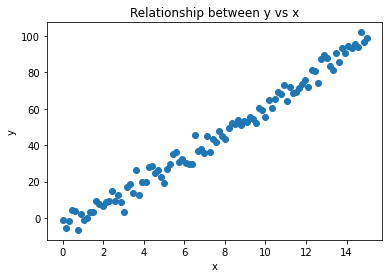

In [12]:
### Code here

fig, ax = plt.subplots()

ax.scatter(X, y)
ax.set_title('Relationship between y vs x')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

#### Comment here

we could consider there is strong positive linear relationship between x and y

### Car Price Prediction Dataset

The objective of this dataset is to predict the price of a car based on its characterisitics. We will use linear regression to predict the price using its features. 

In [14]:
# split data into features and labels
car_price_X = car_price_df.drop(columns=['price'])
car_price_y = car_price_df['price']

**2.1.3 Plot the relationships between the label (price) and the continuous features (citympg, highwaympg, enginesize, horsepower) using a small multiple of scatter plots. Make sure to label the axes.**

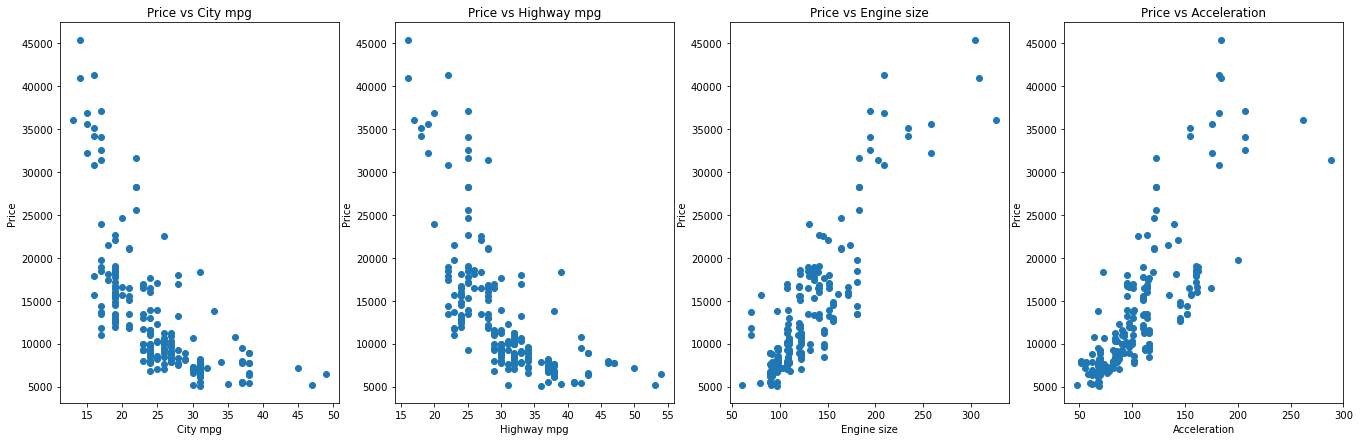

In [15]:
### Code here
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(23, 7))

ax1.scatter(car_price_X['citympg'], car_price_y)
ax1.set_xlabel('City mpg')
ax1.set_ylabel('Price')
ax1.set_title('Price vs City mpg')

ax2.scatter(car_price_X['highwaympg'], car_price_y)
ax2.set_xlabel('Highway mpg')
ax2.set_ylabel('Price')
ax2.set_title('Price vs Highway mpg')

ax3.scatter(car_price_X['enginesize'], car_price_y)
ax3.set_xlabel('Engine size')
ax3.set_ylabel('Price')
ax3.set_title('Price vs Engine size')

ax4.scatter(car_price_X['horsepower'], car_price_y)
ax4.set_xlabel('Acceleration')
ax4.set_ylabel('Price')
ax4.set_title('Price vs Acceleration')

plt.show()

**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

#### Comment here
    
as for the linear regression model, the features such as city mpg, highway mpg have negative linear relationship with price and the features such as engine size and acceleration have positive relationship with price. we could use linear model, but the linear regression model is not a good one since there are many outliers.

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:

**Note: Generate the synthetic data before running the next cell to avoid errors.**


In [17]:
X = X.reshape((100, 1))   # Turn the X vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Only one feature vector

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [55.47920661 13.42527931 26.39143796 36.62805794 65.38959977]


**2.1.5 Encode the categorical variables of the CarPrice dataset.**

In [18]:
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [19]:
### Code here

for i in ['fueltype','aspiration','doornumber','carbody','drivewheel',
          'enginelocation','enginetype','cylindernumber','fuelsystem']:
    enc = OrdinalEncoder(categories = [car_price_df[i].unique()])
    car_price_df[i+'_ord'] = enc.fit_transform(car_price_df[i].to_numpy().reshape(-1,1))
    

**2.1.6 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

In [20]:
### Code here
car_price_X = car_price_df.drop(columns=['price','car_ID'])
car_price_y = car_price_df['price']
print(car_price_X.shape)

(205, 33)


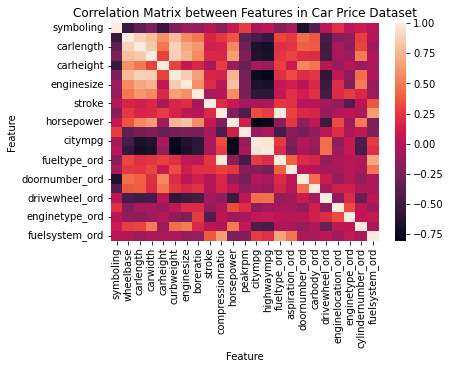

In [21]:
corr = car_price_X.corr()
sns.heatmap(corr, annot=False)
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation Matrix between Features in Car Price Dataset')
plt.show()

In [22]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print('Features to drop:', to_drop)
car_price_new = car_price_df.drop(columns=to_drop)

Features to drop: ['highwaympg', 'fueltype_ord']


/var/folders/4t/xrgyjzp96fb4dmgw0wrydtrm0000gn/T/ipykernel_99812/373653683.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


In [23]:
car_price_new = car_price_new.drop(columns = ['fueltype','aspiration','doornumber','carbody','drivewheel',
          'enginelocation','enginetype','cylindernumber','fuelsystem'])

In [24]:
car_price_new

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,citympg,price,aspiration_ord,doornumber_ord,carbody_ord,drivewheel_ord,enginelocation_ord,enginetype_ord,cylindernumber_ord,fuelsystem_ord
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,21,13495.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,21,16500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,19,16500.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,24,13950.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,18,17450.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,141,3.78,...,23,16845.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0
201,202,-1,volvo 144ea,109.1,188.8,68.8,55.5,3049,141,3.78,...,19,19045.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0
202,203,-1,volvo 244dl,109.1,188.8,68.9,55.5,3012,173,3.58,...,18,21485.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0
203,204,-1,volvo 246,109.1,188.8,68.9,55.5,3217,145,3.01,...,26,22470.0,1.0,1.0,2.0,0.0,0.0,2.0,1.0,6.0


#### Comment here

considering the multilinearity, highly correlated features are not independent of each other, so they need to be removed to reduce the complexity of training without bringing any additional information. 


**2.1.7 Split the dataset into training (60%), validation (20%), and test (20%) sets. Use random_state = 0.**

In [26]:
### Code here
car_price_new_X = car_price_new.drop(columns = ['CarName','car_ID','price'])
car_price_new_y = car_price_new['price']

car_price_X_dev, car_price_X_test, car_price_y_dev, car_price_y_test = train_test_split(car_price_new_X, car_price_new_y, test_size=0.2, random_state=0)
car_price_X_train, car_price_X_val, car_price_y_train, car_price_y_val = train_test_split(car_price_X_dev, car_price_y_dev, test_size=0.25, random_state=0)


**2.1.8 Standardize the columns in the feature matrices.**

In [27]:
### Code here
scaler = StandardScaler()
car_price_X_train = scaler.fit_transform(car_price_X_train)   # Fit and transform scalar on X_train
car_price_X_val = scaler.transform(car_price_X_val)           # Transform X_val
car_price_X_test = scaler.transform(car_price_X_test)         # Transform X_test


**2.1.9 Add a column of ones to the feature matrices for the bias term.**

In [28]:
### Code here
car_price_X_train = np.hstack([np.ones((car_price_X_train.shape[0], 1)), car_price_X_train])
car_price_X_val = np.hstack([np.ones((car_price_X_val.shape[0], 1)), car_price_X_val])
car_price_X_test = np.hstack([np.ones((car_price_X_test.shape[0], 1)), car_price_X_test])

print(car_price_X_train[:5], '\n\n', car_price_y_train[:5])

[[ 1.          0.17546752 -0.40974726 -0.46851364 -0.00339972 -1.15016334
  -0.55669184 -0.43428753 -0.66854906  1.03549495 -0.30391923 -0.09942571
   0.83916558  0.00909065 -0.49236596 -1.25        0.22451317  0.51671684
  -0.12856487 -0.19930603 -0.42269467 -0.27820505]
 [ 1.          0.17546752  0.75843946  1.19517538  0.41476539  0.71966069
   0.89378352  0.82259167 -0.08766405 -0.25186264 -0.32695051  0.44932771
  -1.77525606 -0.78958775 -0.49236596  0.8         0.22451317 -1.24873236
  -0.12856487 -0.19930603  0.3418854  -0.72261051]
 [ 1.         -1.48472517  0.89194651  1.17845488  0.55415375  1.43576351
   1.08794163  0.03122329  1.03780065 -0.38389932 -0.67241966  1.52070343
   0.00255066 -1.26879479  2.0310096   0.8         1.47974592 -1.24873236
  -0.12856487 -0.19930603 -0.42269467 -0.72261051]
 [ 1.         -0.65462882 -0.02591448  0.25882779  0.22891423  0.64009371
  -0.33398106 -0.15498104  0.20277846  0.40832074 -0.41907562 -0.51752355
  -0.62491054  0.16882633 -0.4923

At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Car Price Prediction dataset: car_price_X_train, car_price_X_val, car_price_X_test, car_price_y_train, car_price_y_val, car_price_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.10 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [29]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        a = np.dot(X.T, X)
        b = self.alpha * np.identity(X.shape[1])
        arg = a + b
        inv = np.linalg.inv(arg)
        c = np.dot(X.T, y)
        self.w = np.dot(inv, c)
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        return np.dot(X, self.w)
        

### Train, Evaluate, and Interpret LR Model

**2.1.11 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.**

In [30]:
### Code here
model = LinearRegression(alpha=0)
model.train(X_train, y_train)
preds = model.predict(X_test)

df_preds = pd.DataFrame(columns=['Prediction', 'Actual Label'])

df_preds['Prediction'] = np.concatenate([preds[:3], preds[-3:]])
df_preds['Actual Label'] = np.concatenate([y_test[:3], y_test[-3:]])
df_preds

,Prediction,Actual Label
0,19.796467,19.758792
1,82.651064,87.927239
2,-5.345372,-1.963836
3,17.701314,26.533564
4,27.129503,19.076814
5,0.940088,0.071973


**2.1.12 Plot a scatter plot of y_test vs. X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.** 

>If your line goes through the data points, you have likely implemented the linear regression correctly!

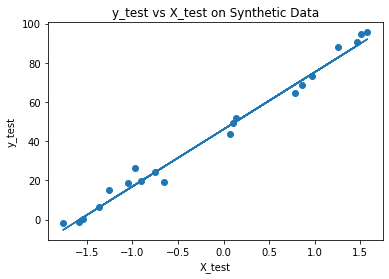

In [31]:
### Code here
plt.scatter(X_test[:,1], y_test)
plt.plot(X_test[:,1], np.dot(X_test, model.w), 1)
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.title('y_test vs X_test on Synthetic Data')
plt.show()

**2.1.13 Train a linear regression model ($\alpha = 0$) on the car price training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [32]:
### Code here

model = LinearRegression(alpha=0)
model.train(car_price_X_train, car_price_y_train)
preds = model.predict(car_price_X_test)
preds_val = model.predict(car_price_X_val)
preds_train = model.predict(car_price_X_train)

df_preds = pd.DataFrame(columns=['Prediction', 'Actual Label'])

df_preds['Prediction'] = np.concatenate([preds[:3], preds[-3:]])
df_preds['Actual Label'] = np.concatenate([car_price_y_test[:3], car_price_y_test[-3:]])
print('Training R2:', r2_score(car_price_y_train, preds_train))
print('Validation R2:', r2_score(car_price_y_val, preds_val))
print('Test R2:', r2_score(car_price_y_test, preds))
df_preds

Training R2: 0.9219905598005702
Validation R2: 0.8499749457913017
Test R2: 0.8147706907036438


,Prediction,Actual Label
0,5950.685925,6795.0
1,19284.306967,15750.0
2,14669.694666,15250.0
3,5957.835652,6377.0
4,36985.325856,45400.0
5,5005.464114,8916.5


**2.1.14 As a baseline model, use the mean of the training labels (car_price_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [33]:
### Code here
mean_train = np.mean(car_price_y_train)
print('Training R2:', 1-np.sum((mean_train - car_price_y_train)**2)/np.sum((mean_train - car_price_y_train)**2))
mean_val = np.mean(car_price_y_val)
print('Validation R2:', 1-np.sum((mean_train - car_price_y_val)**2)/np.sum((mean_val - car_price_y_val)**2))
mean_test = np.mean(car_price_y_test)
print('Test R2:', 1-np.sum((mean_train - car_price_y_test)**2)/np.sum((mean_test - car_price_y_test)**2))

Training R2: 0.0
Validation R2: -0.04252409813108615
Test R2: -0.0028042246944892657


**2.1.15 Interpret your model trained on the car price dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

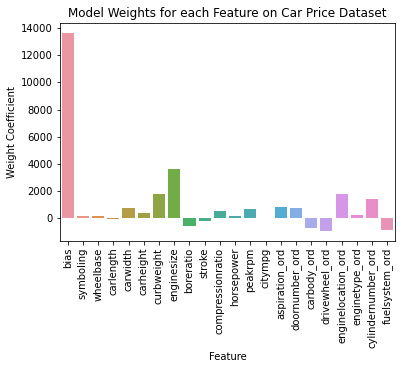

In [34]:
### Code here
feature_names = car_price_new_X.columns.insert(0, 'bias')
ax = sns.barplot(x=feature_names, y=model.w.flatten())
ax.tick_params(axis='x', rotation=90)
ax.set_title('Model Weights for each Feature on Car Price Dataset')
ax.set_xlabel('Feature')
ax.set_ylabel('Weight Coefficient')
plt.show()

**2.1.16 According to your model, which features are the greatest contributors to the car price?**

#### Comment here

the engine size, curb weight and engine location are the greatest contributors to the car price

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the car price dataset.

**2.1.17 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

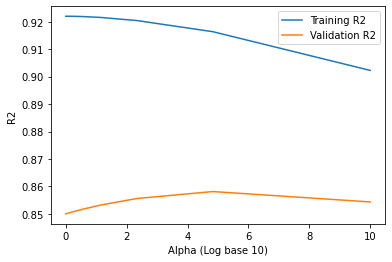

In [36]:
### Code here
alphas = np.logspace(-5, 1, 20)

train_R2s = []
val_R2s = []

for alpha in alphas:
    model = LinearRegression(alpha=alpha)
    model.train(car_price_X_train, car_price_y_train)
    preds = model.predict(car_price_X_test)
    preds_val = model.predict(car_price_X_val)
    preds_train = model.predict(car_price_X_train)
    
    mean_train = np.mean(car_price_y_train)
    train_R2 = 1-np.sum((preds_train - car_price_y_train)**2)/np.sum((mean_train - car_price_y_train)**2)
    train_R2s.append(train_R2)
    mean_val = np.mean(car_price_y_val)
    val_R2 = 1-np.sum((preds_val - car_price_y_val)**2)/np.sum((mean_val - car_price_y_val)**2)
    val_R2s.append(val_R2)
    
plt.plot(alphas, train_R2s, label='Training R2')
plt.plot(alphas, val_R2s, label='Validation R2')
plt.legend()
plt.xlabel('Alpha (Log base 10)')
plt.ylabel('R2')
plt.show()

**2.1.18 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

#### Comment here

with decreasing model complexity, the R square for training is going down and the R square for validation is going up. Both are moving rather slightly.

### 2.2 Logistic Regression

In this part, we will be using a heart disease dataset for classification. 

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides information about patients, over 4,000 records and 15 attributes.


**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Predict variable (desired target):
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [38]:
heart_disease_df = pd.read_csv('heart_disease.csv')
heart_disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Missing Value Analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)**

In [39]:
### Code here
heart_disease_df[heart_disease_df.isnull().any(axis=1)]
heart_disease_df_new = heart_disease_df
heart_disease_df_new = heart_disease_df.fillna(0)

In [40]:
#### Comment here

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.**

In [43]:
### Code here

heart_disease_df_new['TenYearCHD'].value_counts() / len(heart_disease_df_new['TenYearCHD'])


0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

#### Comment here

the distribution of labels is obviously not balanced since the proportion of the 0 label is much larger than 1 label.

**2.2.3 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

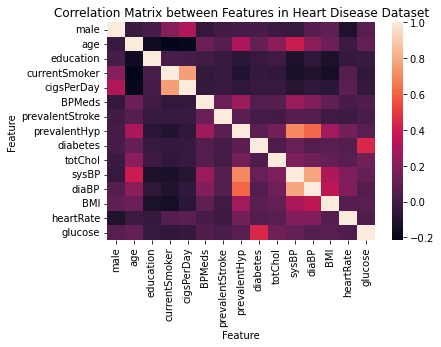

In [44]:
### Code here
heart_disease_X = heart_disease_df_new.drop(columns = ['TenYearCHD'])
heart_disease_Y = heart_disease_df_new['TenYearCHD']

corr = heart_disease_X.corr()
sns.heatmap(corr, annot=False)
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation Matrix between Features in Heart Disease Dataset')
plt.show()

In [46]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print('Features to drop:', to_drop)
heart_disease_new = heart_disease_df_new.drop(columns=to_drop)

Features to drop: []


/var/folders/4t/xrgyjzp96fb4dmgw0wrydtrm0000gn/T/ipykernel_99812/2484504596.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


#### Comment here

there is not high correlation between the given numerical features

**2.2.4 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [47]:
### Code here
#1)Convert the label from a Pandas series to a Numpy (m x 1) vector
heart_disease_Y = heart_disease_Y.to_numpy()
heart_disease_Y = heart_disease_Y.reshape((heart_disease_Y.shape[0], 1))
# 2)Split the dataset into training (60%), validation (20%), and test (20%) sets.
X_dev_hd, X_test_hd, y_dev_hd, y_test_hd = train_test_split(heart_disease_X, heart_disease_Y, test_size=0.2, random_state=0)
X_train_hd, X_val_hd, y_train_hd, y_val_hd = train_test_split(X_dev_hd, y_dev_hd, test_size=0.25, random_state=0)

# 3)Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train_hd = scaler.fit_transform(X_train_hd)   # Fit and transform scalar on X_train
X_val_hd = scaler.transform(X_val_hd)           # Transform X_val
X_test_hd = scaler.transform(X_test_hd)         # Transform X_test

# 4)Add a column of ones to the feature matrices
X_train_hd = np.hstack([np.ones((X_train_hd.shape[0], 1)), X_train_hd])
X_val_hd = np.hstack([np.ones((X_val_hd.shape[0], 1)), X_val_hd])
X_test_hd = np.hstack([np.ones((X_test_hd.shape[0], 1)), X_test_hd])


### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [49]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.5 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

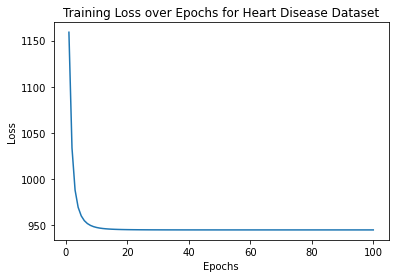

Test Accuracy: 0.8431603773584906


In [50]:
### Code here
from sklearn.metrics import accuracy_score

# A
model = LogisticRegression(alpha=0, t=100, eta=1e-3)
loss = model.train(X_train_hd, y_train_hd)
loss = np.array(loss).reshape(np.array(loss).shape[0],)
plt.plot(np.arange(1, 101), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs for Heart Disease Dataset')
plt.show()

print('Test Accuracy:', accuracy_score(y_test_hd, model.predict(X_test_hd)))

In [51]:
# B and C
np.random.seed(0)

alphas = np.random.uniform(0, 1, 20)
etas = np.random.uniform(0, 0.001, 20)
ts = np.random.randint(0, 100, 20)

best_accu = 0
best_alpha = -1
best_eta = -1
best_t = -1

for i in range(20):
    alpha = alphas[i]
    eta = etas[i]
    t = ts[i]
    
    model = LogisticRegression(alpha=alpha, t=t, eta=eta)
    model.train(X_train_hd, y_train_hd)
    preds_val = model.predict(X_val_hd)
    accu_val = accuracy_score(y_val_hd, preds_val)
    
    if best_accu < accu_val:
        best_accu = accu_val
        best_alpha = alpha
        best_eta = eta
        best_t = t

print('Best alpha:', best_alpha)
print('Best eta:', best_eta)
print('Best t:', best_t)
print('Validation Accuracy:', accu_val)

print('Test Accuracy:', accuracy_score(y_test_hd, model.predict(X_test_hd)))

Best alpha: 0.7151893663724195
Best eta: 0.0007991585642167236
Best t: 31
Validation Accuracy: 0.8549528301886793
Test Accuracy: 0.8431603773584906


**2.2.6 Do you think the model is performing well keeping the class distribution in mind?**

#### Comment here

the model is not performing well since there is no significant difference between the model accuracy and the model that set all the data label 0

> We will look into different evaluation metrics in Lecture 5 that will help us with such imbalanced datasets. 

### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

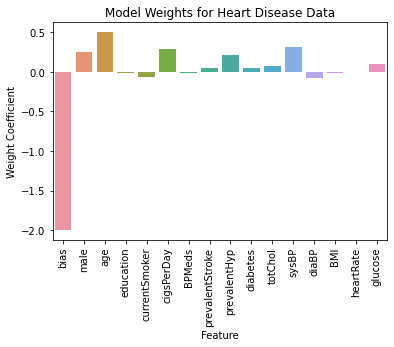

In [52]:
### Code here
model = LogisticRegression(alpha=best_alpha, t=best_t, eta=best_eta)
w = model.train(X_train_hd, y_train_hd)

feature_names = heart_disease_X.columns.insert(0, 'bias')
ax = sns.barplot(x=feature_names, y=model.w.flatten())
ax.tick_params(axis='x', rotation=90)
ax.set_title('Model Weights for Heart Disease Data')
ax.set_xlabel('Feature')
ax.set_ylabel('Weight Coefficient')
plt.show()

#### Comment here

the feature like age and cigs per day are most important ones to predict the 10 year risk of heart disease


# **Part 3: Support Vector Machines**

In this part, we will be using support vector machines for classification on the heart disease dataset.

### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [53]:
### Code here
model = LinearSVC(dual=False)
model.fit(X_train_hd, y_train_hd)
print('Training accuracy:', np.mean(model.predict(X_train_hd) == y_train_hd))
print('Validation accuracy:', np.mean(model.predict(X_val_hd) == y_val_hd))
print('Test accuracy:', np.mean(model.predict(X_test_hd) == y_test_hd))

Training accuracy: 0.850814421572809
Validation accuracy: 0.8438890619437522
Test accuracy: 0.8348778479886081


/Users/chenziruo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [54]:
### Code here
model = SVC(kernel='linear')
model.fit(X_train_hd, y_train_hd)
print('Training accuracy:', np.mean(model.predict(X_train_hd) == y_train_hd))
print('Validation accuracy:', np.mean(model.predict(X_val_hd) == y_val_hd))
print('Test accuracy:', np.mean(model.predict(X_test_hd) == y_test_hd))

/Users/chenziruo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy: 0.8524783634933124
Validation accuracy: 0.8455188679245284
Test accuracy: 0.8372641509433962
